In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [131]:
data = pd.read_csv('housing.csv')

In [132]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [133]:
data.dropna(inplace=True)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [81]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train = pd.get_dummies(X_train, columns=['ocean_proximity'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['ocean_proximity'], drop_first=True)

In [135]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,avg_rooms
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,0,0,0,0,0.209429,4.951740
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,1,0,0,0,0.174710,5.954023
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,1,0,0,0,0.217939,5.126482
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,0,0,0,0,0.401778,2.642058
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,0,0,0,1,0.213159,4.551980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,0,0,0,0,0.167168,6.602649
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,0,0,0,0,0.177044,5.840160
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,0,0,0,0,0.231493,4.403315
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,0,0,1,0,0.186047,5.410596


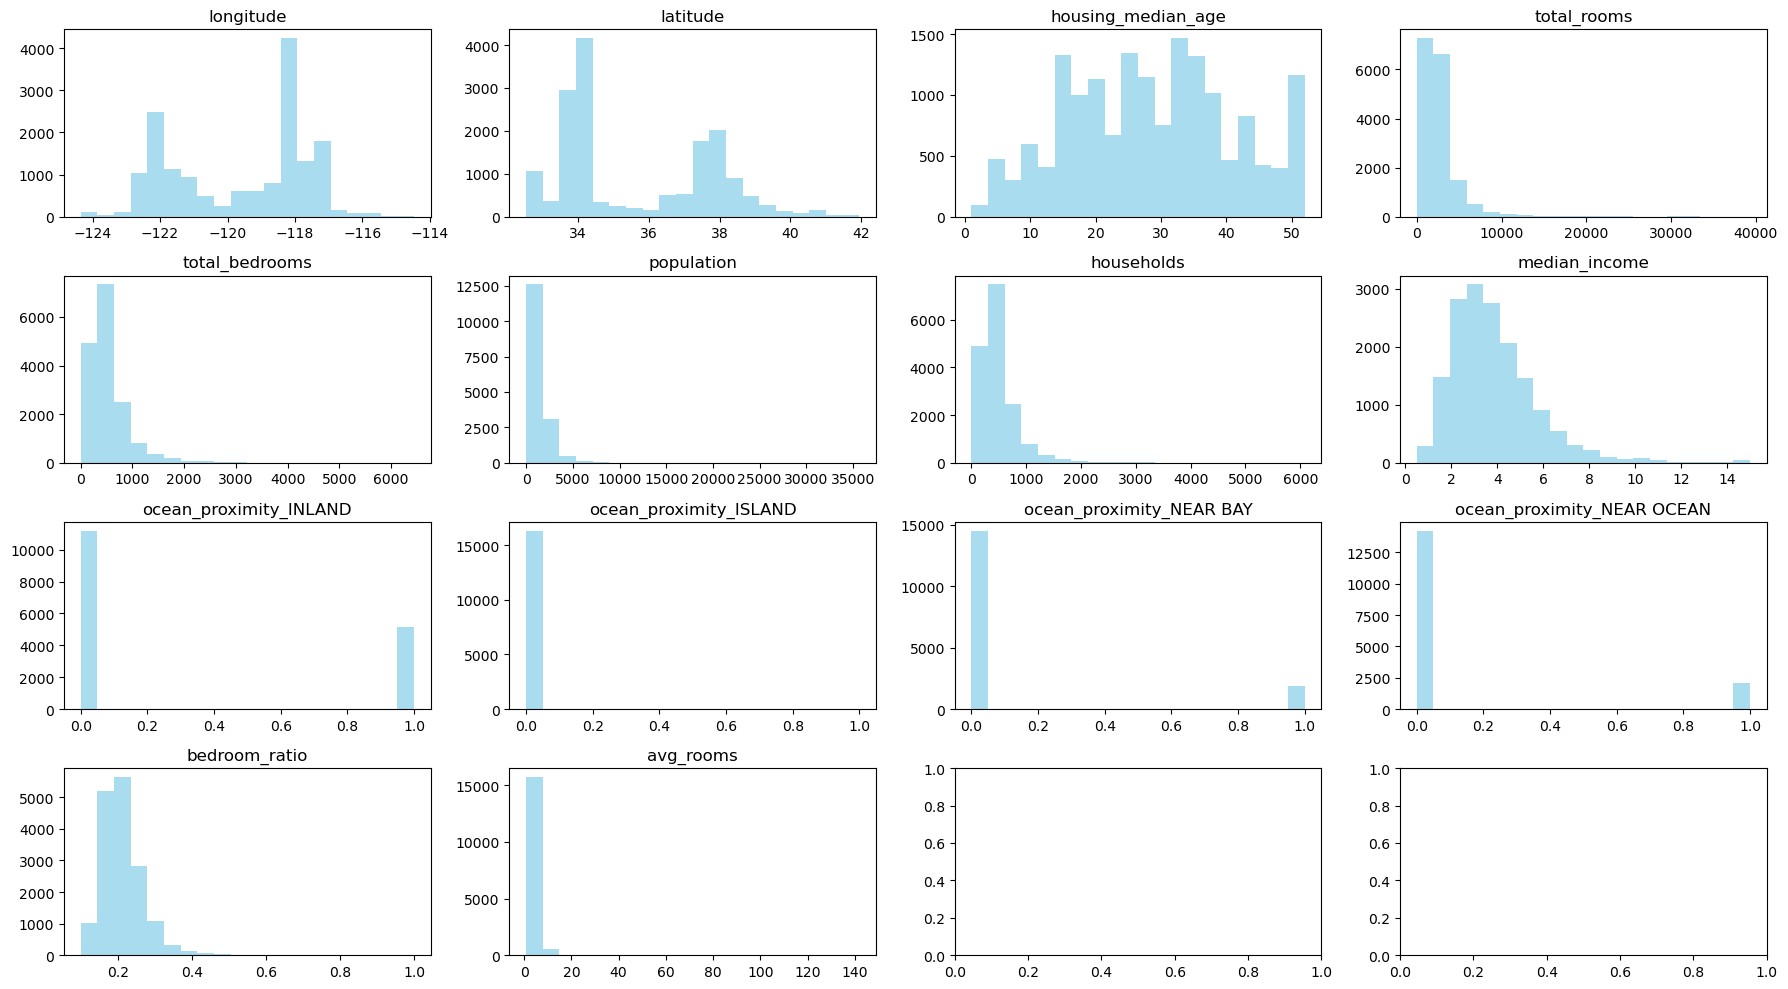

In [150]:
import matplotlib.pyplot as plt

num_bins = 20 

fig, axes = plt.subplots(4, 4, figsize=(18, 10))

axes = axes.ravel()

for i, column in enumerate(X_train.columns):
    axes[i].hist(X_train[column], bins=num_bins, color='skyblue', alpha=0.7)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

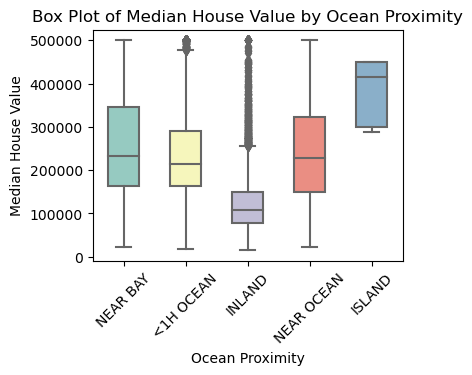

In [238]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data, width=0.5, palette='Set3')
plt.xticks(rotation=45)
plt.title('Box Plot of Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

In [136]:
X_train['bedroom_ratio'] = X_train['total_bedrooms'] / X_train['total_rooms']
X_train['avg_rooms'] = X_train['total_rooms'] / X_train['households']
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,avg_rooms
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,0,0,0,0,0.209429,4.951740
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,1,0,0,0,0.174710,5.954023
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,1,0,0,0,0.217939,5.126482
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,0,0,0,0,0.401778,2.642058
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,0,0,0,1,0.213159,4.551980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,0,0,0,0,0.167168,6.602649
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,0,0,0,0,0.177044,5.840160
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,0,0,0,0,0.231493,4.403315
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,0,0,1,0,0.186047,5.410596


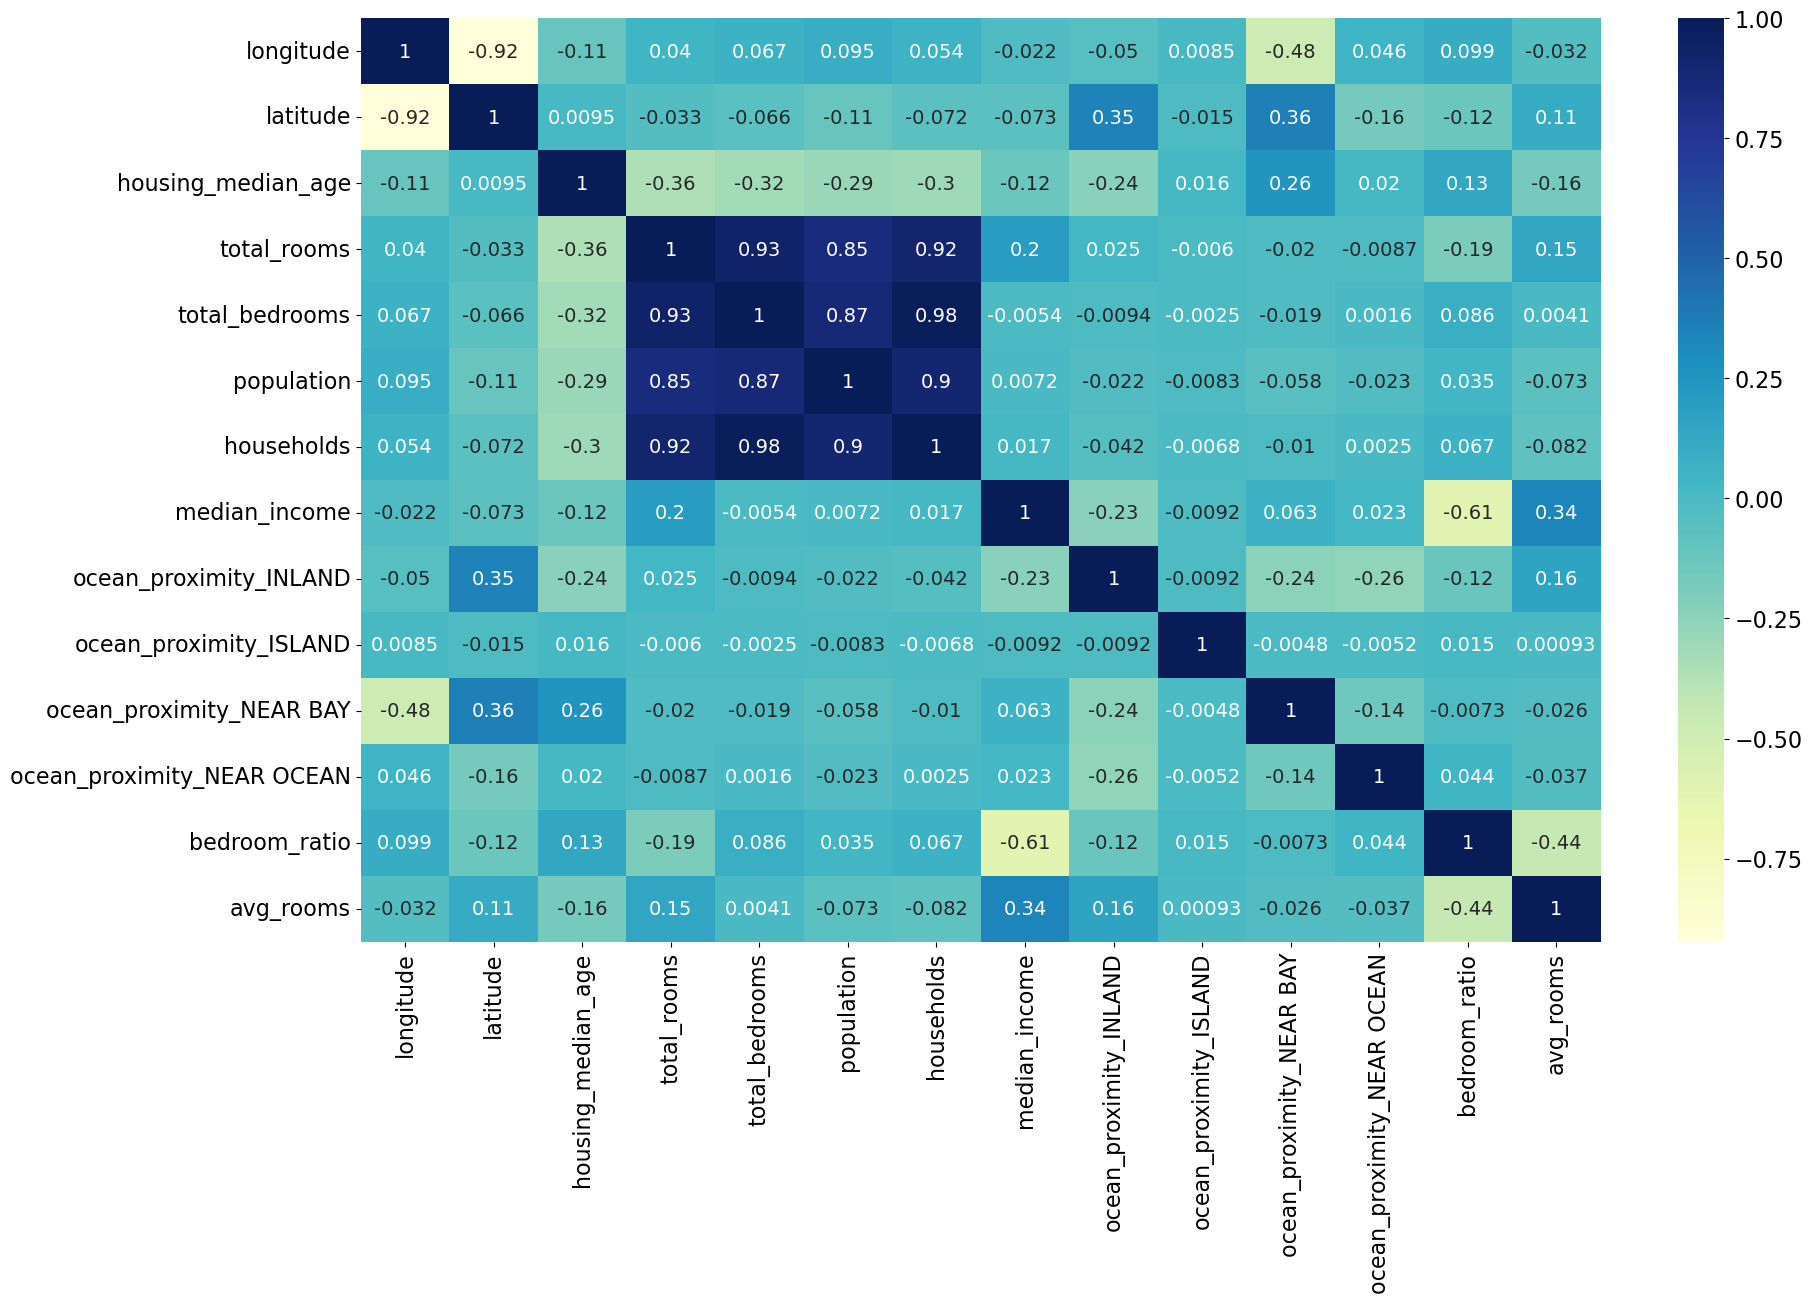

In [235]:
label_font_size = 16  # You can adjust the font size as needed
annot_font_size = 14  # Adjust the annotation font size

plt.figure(figsize=(20, 12))
heatmap = sns.heatmap(X_train.corr(), annot=True, cmap='YlGnBu', annot_kws={"size": annot_font_size})

# Set the font size for the labels and color bar
plt.xticks(fontsize=label_font_size)
plt.yticks(fontsize=label_font_size)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=label_font_size)

plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

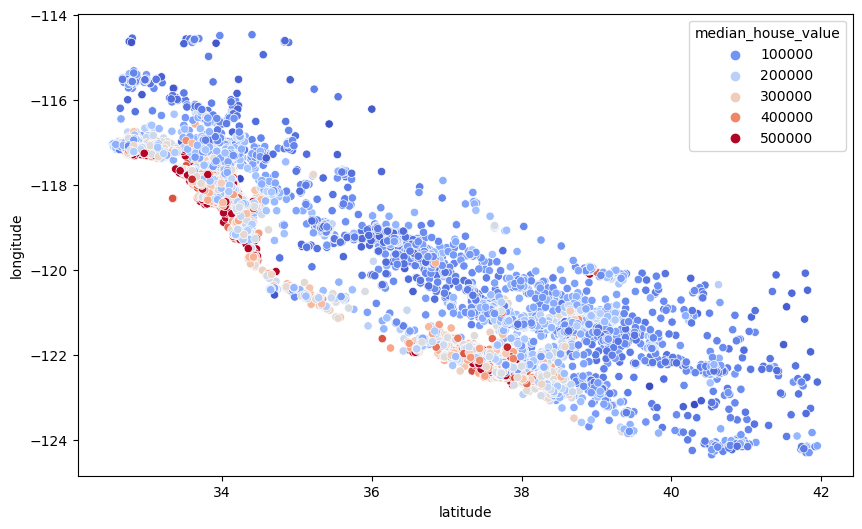

In [130]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='latitude', y='longitude', data=X_train, hue=y_train, palette='coolwarm')

In [128]:
y_train = y_train

In [129]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [123]:
y_pred = model.predict(X_test)

In [146]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 4767408283.392152
R-squared: 0.6513824308446567


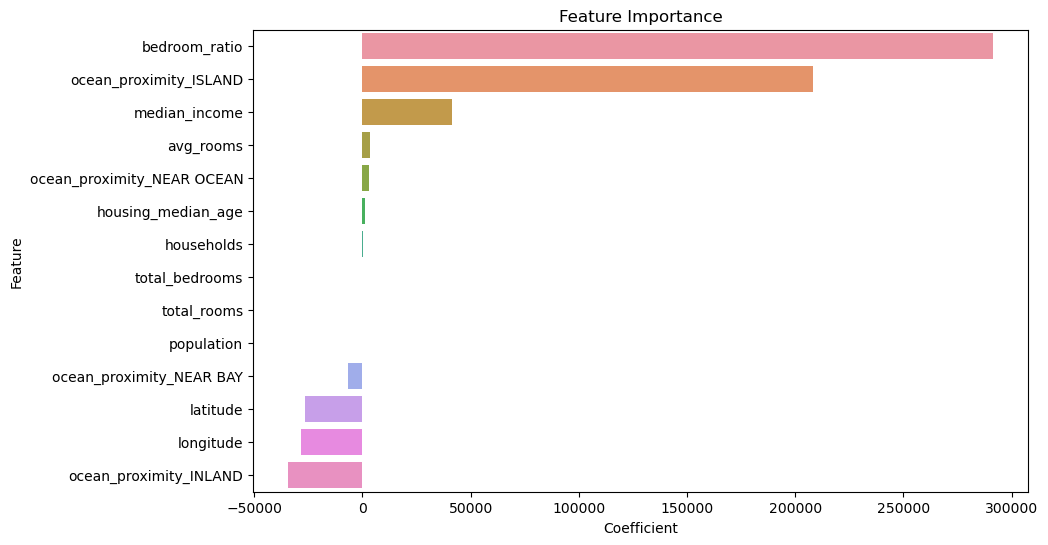

In [126]:
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

In [117]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [119]:
rf_pred = random_forest_model.predict(X_test)

In [141]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("\nRandom Forest Regression:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")


Random Forest Regression:
Mean Squared Error: 2385336928.5104446
R-squared: 0.8255718175993735


In [180]:
from sklearn.model_selection import cross_val_score

linear_cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
linear_cv_mse = -linear_cv_scores.mean()

rf_cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_cv_mse = -rf_cv_scores.mean()

print("Cross-Validation Results:")
print(f"Linear Regression - Mean Squared Error: {linear_cv_mse}")
print(f"Random Forest Regression - Mean Squared Error: {rf_cv_mse}")

Cross-Validation Results:
Linear Regression - Mean Squared Error: 4625521329.31745
Random Forest Regression - Mean Squared Error: 2480563455.9276533


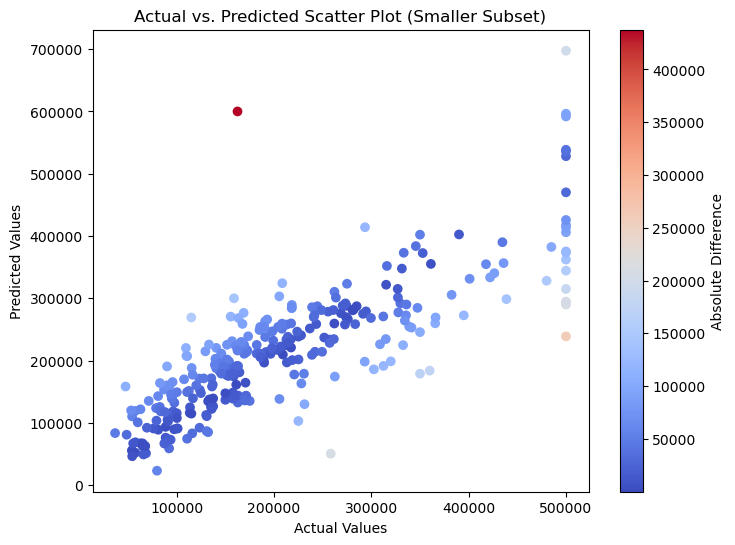

In [220]:
subset_size = 300 # You can change this to your desired subset size
subset_indices = np.random.choice(len(y_test), size=subset_size, replace=False)

# Create a scatter plot with a colormap based on the absolute differences
abs_diff = np.abs(y_test.iloc[subset_indices] - y_pred[subset_indices])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(y_test.iloc[subset_indices], y_pred[subset_indices], c=abs_diff, cmap='coolwarm')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Scatter Plot (Smaller Subset)')
plt.colorbar(scatter, label='Absolute Difference')
plt.show()

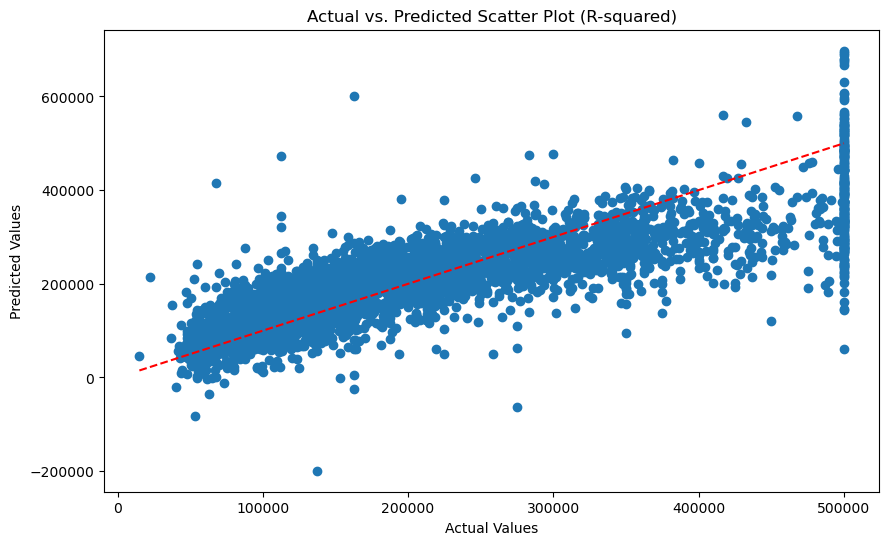

In [221]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Scatter Plot (R-squared)')
plt.show()